# SETTING UP APIS

In [1]:
#SH
import yfinance as yf #Allows us to Use Yahoo Finance API 
import pandas as pd
import numpy as np
import json

# BUILDING SIMPLE FUNCTIONS FOR TICKER INFO FROM API

In [2]:
#SH
#Function to Get Different Kinds Of Info From a Stock Ticker Directly Through API 

def ticker_info():
    ticker_name = input("Enter Ticker Name")
    ticker_information = yf.Ticker(ticker_name).info
    return ticker_information

In [3]:
#SH
#ticker_info()

#This will stop the autorun until a ticker symbol is inputted. So to ensure you can run the code without constantly stopping it it has been changed to #ticker_info
#What this does is return the info you want based on the inputted ticker you enter. 

In [4]:
#SH
#Function to Pull Current Price from a Stock Ticker Directly Through API

def current_ticker_price():
    ticker_name = input("Enter Ticker Name")
    ticker_symbol = yf.Ticker(ticker_name)
    ticker_data = ticker_symbol.history(period="min")
    ticker_open = ticker_data.filter(['Open'])
    ticker_open = ticker_open.rename(columns = {"Open": ticker_name}) 
    print(ticker_open)

In [5]:
#SH
#current_ticker_price()

#This will stop the autorun until a ticker symbol is inputted. So to ensure you can run the code without constantly stopping it it has been changed to #ticker_info
#What this does is return the info you want based on the inputted ticker you enter. 

In [6]:
#SH
#TO SEE THE PERFORMANCE OF ONE PARTICULAR STOCK OVER TIME
AAPL = yf.Ticker("AAPL")
df = AAPL.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100764,0.101203,0.100764,0.100764,469033600,0.0,0.0
1980-12-15,0.095946,0.095946,0.095508,0.095508,175884800,0.0,0.0
1980-12-16,0.088936,0.088936,0.088498,0.088498,105728000,0.0,0.0
1980-12-17,0.090688,0.091126,0.090688,0.090688,86441600,0.0,0.0
1980-12-18,0.093317,0.093755,0.093317,0.093317,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000,0.0,0.0
2021-12-14,175.250000,177.740005,172.210007,174.330002,139380400,0.0,0.0
2021-12-15,175.110001,179.500000,172.309998,179.300003,131063300,0.0,0.0


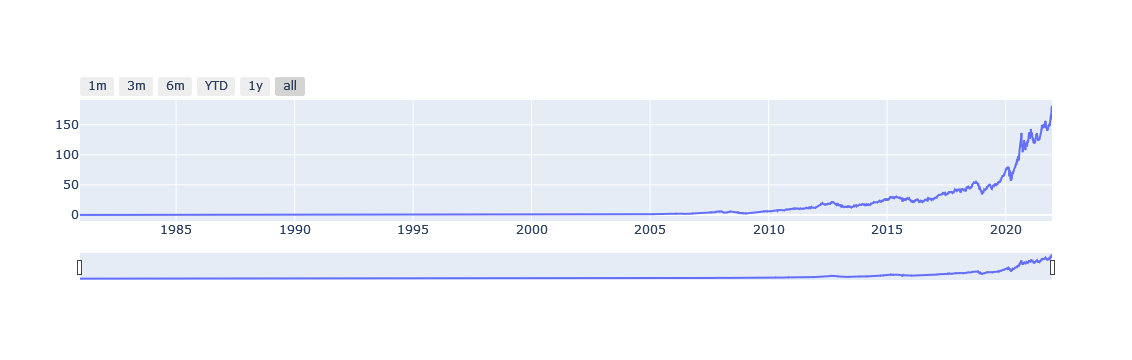

In [49]:
#CK
#Edited by SH

#Reseting the index
df = df.reset_index()
#Converting the datatype to float
for i in ['Open']:
    df[i] = df[i].astype('float64')
    
#Creating a Line chart using Plotly Graph_objects with Range slider and button
#A line chart is highly used for time series analysis, for viewing the stock trend over a time period.

import plotly
import plotly.graph_objects as go
    
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Open'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month",                                        
                 stepmode="backward"),
            dict(count=3, label="3m", step="month",  
                 stepmode="backward"),
            dict(count=6, label="6m", step="month",  
                 stepmode="backward"),            
            dict(count=1, label="YTD", step="year", 
                 stepmode="todate"),
            dict(count=1, label="1y", step="year", 
                 stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# SETTING UP SAMPLE MONGODB

In [9]:
#SH
import yfinance as yf #Allows us to Use Yahoo Finance API 
import pandas as pd
import numpy as np
import json
import datetime 
import requests
import pymongo
import requests

In [10]:
#SH
#SETS CONNECTION SAME WAY WE WERE TAUGHT FROM CLASS EXAMPLE
from pymongo import MongoClient
client = MongoClient('localhost',27017) ## or MongoClient("localhost:27")
db = client.apan5400

In [11]:
#SH
#Setting Up the Sample Data For Stocks

#Pulling Stocks from Stock Using Ticker API
msft = yf.Ticker("MSFT").info
aapl = yf.Ticker("AAPL").info
tsla = yf.Ticker("TSLA").info
sony = yf.Ticker("SONY").info
mcd = yf.Ticker("MCD").info
fb = yf.Ticker("FB").info
jpm = yf.Ticker("JPM").info
dis = yf.Ticker("DIS").info
cost = yf.Ticker("COST").info
cvs = yf.Ticker("CVS").info
nflx = yf.Ticker("NFLX").info
sbux = yf.Ticker("SBUX").info
uber = yf.Ticker("UBER").info
nke = yf.Ticker("NKE").info
amzn = yf.Ticker("AMZN").info
pfe = yf.Ticker("PFE").info
googl = yf.Ticker("GOOGL").info
lrlcy = yf.Ticker("LRLCY").info
dell = yf.Ticker("DELL").info
unh = yf.Ticker("UNH").info

#Pulling ETFs Using Ticker API
spy = yf.Ticker('SPY').info
vti = yf.Ticker('VTI').info
voo = yf.Ticker('VOO').info
vwo = yf.Ticker('VWO').info
vea = yf.Ticker('VEA').info
qqq = yf.Ticker('QQQ').info
ivv = yf.Ticker('IVV').info
iefa = yf.Ticker('IEFA').info
efa = yf.Ticker('EFA').info
agg = yf.Ticker('AGG').info

In [12]:
#SH

# Use json.dump to store the above 20 Stocks and 10 largest ETFs into jSon file

# The json file where the output must be stored
stock_info = [msft, aapl, tsla, sony, mcd, fb, jpm, dis, cost, cvs, nflx, sbux, uber, nke, amzn, pfe, googl, lrlcy, dell, unh, spy, vti, voo, vwo, vea, qqq, ivv, iefa, efa, agg]
out_file = open("stock_info.json", "w") 
json.dump(stock_info, out_file, indent = 6)
out_file.close()

In [13]:
#SH
with open("stock_info.json", "r") as read_file:
    stock_info_data = json.load(read_file)

In [14]:
#SH
collection = db.stock_info
print("before dropping collection:", collection.count_documents({}))
collection.drop()
print("after dropping collection:", collection.count_documents({}))

before dropping collection: 30
after dropping collection: 0


In [15]:
#SH
collection.insert_many(stock_info_data)

In [16]:
#SH
msft_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/MSFT?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
aapl_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
tsla_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/TSLA?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
sony_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/SONY?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
mcd_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/MCD?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
fb_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/FB?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
jpm_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/JPM?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
dis_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/DIS?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
cost_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/COST?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
cvs_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/CVS?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
nflx_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/NFLX?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
sbux_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/SBUX?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
uber_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/UBER?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
nke_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/NKE?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
amzn_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/AMZN?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
pfe_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/PFE?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
googl_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/GOOGL?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
lrlcy_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/LRLCY?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
dell_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/DELL?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
unh_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/UNH?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
spy_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/SPY?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
vti_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/VTI?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
voo_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/VOO?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
vwo_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/VWO?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
vea_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/VEA?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
qqq_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/QQQ?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
ivv_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/IVV?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
iefa_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/IEFA?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
efa_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/EFA?apikey=9cd6b96b4b472eb298b9178e91959c51').json()
agg_prices = requests.get('https://financialmodelingprep.com/api/v3/historical-price-full/AGG?apikey=9cd6b96b4b472eb298b9178e91959c51').json()

In [17]:
#SH
# Use json.dump to store the above 20 Stocks and 10 largest ETFs into etf.jSon file

# The json file where the output must be stored
prices = [msft_prices, aapl_prices, tsla_prices, sony_prices, mcd_prices, fb_prices, jpm_prices, dis_prices, 
          cost_prices, cvs_prices, nflx_prices, sbux_prices, uber_prices, nke_prices, amzn_prices, pfe_prices, 
          googl_prices, lrlcy_prices, dell_prices, unh_prices, spy_prices, vti_prices, voo_prices, vwo_prices, 
          vea_prices, qqq_prices, ivv_prices, iefa_prices, efa_prices, agg_prices]
out_file = open("stock_prices.json", "w") 
json.dump(prices, out_file, indent = 6)
out_file.close()

In [18]:
#SH
with open("stock_prices.json", "r") as read_file:
    stock_prices_data = json.load(read_file)

In [19]:
#SH
collection = db.stock_prices
print("before dropping collection:", collection.count_documents({}))
collection.drop()
print("after dropping collection:", collection.count_documents({}))

before dropping collection: 30
after dropping collection: 0


In [20]:
#SH
collection.insert_many(stock_prices_data)
total_docs = collection.count_documents({})
total_docs

30

In [21]:
#SH

#Count Number of Stocks That the Stock Info Query is Recommending to Buy Based on Recommendation Key 

collection = db.stock_info #Sets collection back to stock_info since we want to use that

query = {
    "recommendationKey": {
        "$regex": 'buy',
        "$options" :'i' # case-insensitive
    }
}
results = collection.find(query)
print("Number of Stocks Recommended to Buy As Of Today", collection.count_documents(query))

Number of Stocks Recommended to Buy As Of Today 18


In [22]:
#SH

print("The Stocks Recommended to Buy are:")
for item in results:
    print(item['symbol'])

The Stocks Recommended to Buy are:
MSFT
AAPL
SONY
MCD
FB
JPM
DIS
COST
CVS
NFLX
SBUX
UBER
NKE
AMZN
GOOGL
LRLCY
DELL
UNH


In [23]:
#SH

#This will Return All the Stock's Market Price in Descending Order

print("The Stocks Sorted By Price:")

for item in collection.find(sort=[("regularMarketPrice", -1)]):
    print(item['symbol'],item['regularMarketPrice'])

The Stocks Sorted By Price:
AMZN 3400.35
GOOGL 2834.5
TSLA 932.57
NFLX 586.73
COST 547.61
UNH 487.12
IVV 462.11
SPY 459.87
VOO 424.39
QQQ 384.91
FB 333.79
MSFT 323.8
MCD 261.7
VTI 235.44
AAPL 171.14
NKE 161.36
JPM 156.76
DIS 148.76
SONY 121.13
AGG 114.5
SBUX 108.63
CVS 100.36
LRLCY 92.41
EFA 76.65
IEFA 72.52
PFE 59.48
DELL 54.65
VEA 50.39
VWO 48.96
UBER 39.68


In [24]:
#SH

#For example if you want to find The Highest Mean Prices For Stocks Available That Are Categorized as Equity
query = {
    "quoteType": {
        "$regex": 'equity',
        "$options" :'i' # case-insensitive
    }
}
results = collection.find(query)

print("The Highest Mean Prices For Equity Stocks Available:")
for item in results.sort("targetMeanPrice", -1):
    print(item['symbol'],item['targetMeanPrice'])

The Highest Mean Prices For Equity Stocks Available:
AMZN 4142.65
GOOGL 3141.61
TSLA 861.01
NFLX 615.81
UNH 461.86
COST 445.65
FB 415.54
MSFT 365.4
MCD 265.56
DIS 210.23
NKE 184.13
AAPL 174.22
JPM 168.9
SONY 154.95
SBUX 131.26
DELL 118.21
LRLCY 98
CVS 96.11
UBER 67.25
PFE 46.23
EFA None


In [25]:
#SH

#For example if you want to find Domestic US Based Stocks/Funds 

query = {
    "country": {
        "$regex": 'united states',
        "$options" :'i' # case-insensitive
    }
}
results = collection.find(query)

print("The Domestic Choices available are:")
for item in results:
    print(item['symbol'],item['regularMarketPrice'])

The Domestic Choices available are:
MSFT 323.8
AAPL 171.14
TSLA 932.57
MCD 261.7
FB 333.79
JPM 156.76
DIS 148.76
COST 547.61
CVS 100.36
NFLX 586.73
SBUX 108.63
UBER 39.68
NKE 161.36
AMZN 3400.35
PFE 59.48
GOOGL 2834.5
DELL 54.65
UNH 487.12


In [26]:
#SH

#Find Stocks that are in the Technology Sector and Their Price

collection = db.stock_info #Sets collection back to stock_info since we want to use that

query = {
    "sector": {
        "$regex": 'technology',
        "$options" :'i' # case-insensitive
    }
}
results = collection.find(query)
print("Number of Stocks Listed as Technology:", collection.count_documents(query))

for item in results:
    print(item['symbol'],item['currentPrice'])

Number of Stocks Listed as Technology: 5
MSFT 323.8
AAPL 171.14
SONY 121.13
UBER 39.68
DELL 54.65


# SQL DATABASE

In [27]:
#SH
#To setup the postgreSQL Database using PgAdmin

import psycopg2, os

print('Connecting to the PostgreSQL database...')
conn = psycopg2.connect(
    host="localhost",
    port='5432',
    database="postgres",
    user="postgres",
    password="123")
cur = conn.cursor()

Connecting to the PostgreSQL database...


In [28]:
#SH
# execute a statement
print('PostgreSQL database version:')
cur.execute('SELECT version()')

# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)

#CREATE THE TABLES TO BE USED IN THE DATABASE
createCmd = """
DROP TABLE IF EXISTS stock_prices;
DROP TABLE IF EXISTS users;
DROP TABLE IF EXISTS trades;

CREATE TABLE stock_prices (
                price_date date,
                ticker varchar(20) NOT NULL,
                price float NOT NULL,
                PRIMARY KEY (price_date, ticker)
                );
                
                CREATE TABLE trades (
                uid integer NOT NULL,
                ticker varchar(20) NOT NULL,
                trade_date date,
                amount integer
                );
        
                
                CREATE TABLE users (
                uid integer,
                user_name varchar (100),
                fantasy_name varchar (100),
                PRIMARY KEY (uid)
                );
            """
    
cur.execute(createCmd)
conn.commit()

PostgreSQL database version:
('PostgreSQL 13.4 (Debian 13.4-1.pgdg110+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 10.2.1-6) 10.2.1 20210110, 64-bit',)


In [29]:
#SH
#Specifying the Stock tickers to be pulled from the API
array = ["MSFT", "AAPL", "TSLA", "SONY", "MCD", "FB", "JPM", "DIS", "COST", "CVS", "NFLX", "SBUX", "UBER", 
         "NKE", "AMZN", "PFE", "GOOGL", "LRLCY", "DELL", "UNH", "SPY", "VTI", "VOO", "VWO", "VEA", "QQQ", 
         "IVV", "IEFA", "EFA", "AGG"]

#Loop to Pull the Data from the API
prices = []
for ticker in array:
    open_prices = yf.Ticker(ticker).history(period="6mo").filter(["Open"])
    open_prices.reset_index()
    open_prices["date"] = open_prices.index
    open_prices["ticker"] = ticker
    prices.extend(open_prices[["date", "ticker", "Open"]].values)
print(len(prices), "prices")


3810 prices


In [30]:
#SH
#Inserts the Data into the Table in PgAdmin SQL 
print(len(prices), "prices")
query = """INSERT INTO stock_prices(price_date,ticker,price) VALUES(%s, %s, %s)"""
cur.executemany(query, tuple(prices))
conn.commit()

3810 prices


In [31]:
#SH
#Pulling the Trade Data
trade_data = pd.read_csv("User_Trades.csv", skipinitialspace=True)
print(len(trade_data.values), "trades")

600 trades


In [32]:
#SH
trade_data

,uid,ticker,trade_date,amount
0,2,PFE,12/12/2021,-3
1,4,JPM,12/11/2021,23
2,2,AAPL,10/22/2021,-10
3,4,GOOGL,9/7/2021,-10
4,5,SBUX,9/18/2021,18
...,...,...,...,...
595,2,SBUX,9/14/2021,-16
596,6,SPY,9/9/2021,-9
597,5,NKE,10/5/2021,17
598,2,COST,11/7/2021,1


In [33]:
#SH
#Inserting the Trade Data into PgAdmin SQL 
print(len(trade_data), 'trades')
query = """INSERT INTO trades(uid,ticker,trade_date,amount) VALUES(%s, %s, %s, %s)"""
cur.executemany(query, trade_data.values)
conn.commit()

600 trades


In [34]:
#SH
# Filter data to only trades that have a price. The rest are bad/illegal trades that cannot be executed as they were done on days where you cannot trade
query = """
DROP TABLE IF EXISTS trades_clean;

select t.* 
into trades_clean
from trades t, stock_prices p
where t.trade_date = p.price_date
and t.ticker = p.ticker;
"""
cur.execute(query)
conn.commit()

In [35]:
#SH
# Pulling the User Data
user_data = pd.read_csv("User_Data.csv")
print(len(user_data.values), "users")

6 users


In [36]:
#SH
user_data

,uid,user_name,fantasy_name
0,1,Sandy He,Never Gonna Give You Up
1,2,Randy Le,Never Gonna Let You Down
2,3,Andy Ye,Never Gonna Run Around and Desert You
3,4,Daisy Wen,Never Gonna Make You Cry
4,5,Maisie Yen,Never Gonna Say Goodbye
5,6,Jacy Sen,Never Gonna Tell A Lie and Hurt You


In [37]:
#SH
#Inserting the User Data into PgAdmin SQL

print(len(user_data.values), "users")
query = """INSERT INTO users(uid, user_name, fantasy_name) VALUES(%s, %s, %s)"""
cur.executemany(query, user_data.values)
conn.commit()

6 users


In [38]:
#SH
#Create the Total Changes Table Which Summarizes the Differences in Stock Balances Based on User Trades 

createCmd = """
DROP TABLE IF EXISTS total_changes;

SELECT uid, SUM(t.amount * p.price) AS final_change
INTO total_changes
FROM trades_clean t, stock_prices p
WHERE t.ticker = p.ticker
AND t.trade_date = p.price_date
GROUP BY uid

"""
    
cur.execute(createCmd)
conn.commit()

In [39]:
#SH
# Read data from PostgreSQL database table and load into a DataFrame instance

df_total_changes = pd.read_sql("SELECT * FROM \"total_changes\"", conn);
 
pd.set_option('display.expand_frame_repr', False);

# Print the DataFrame
df_total_changes

,uid,final_change
0,4,259358.096310
1,6,98394.031045
2,3,44836.926772
3,1,-12166.610302
4,5,-8658.792136
5,2,42732.691783


In [40]:
#SH
#Creates the Final Balances Table Which Summarizes the Total Balance in Stocks Users Still Have in Their Portfolio

createCmd = """
DROP TABLE IF EXISTS final_balances;

SELECT uid, t.ticker, SUM(t.amount* p.price) AS final_balance
INTO final_balances
FROM trades_clean t, stock_prices p
WHERE t.uid = t.uid
AND t.ticker = p.ticker
AND p.price_date = (SELECT MAX(price_date) FROM stock_prices)
GROUP BY uid, t.ticker

"""
    
cur.execute(createCmd)
conn.commit()

In [41]:
#SH
# Read data from PostgreSQL database table and load into a DataFrame instance

df_final_balance = pd.read_sql("SELECT * FROM \"final_balances\"", conn);
 
pd.set_option('display.expand_frame_repr', False);

# Print the DataFrame
df_final_balance

,uid,ticker,final_balance
0,4,QQQ,3833.299866
1,1,IVV,14369.119659
2,6,NKE,-3394.230103
3,3,AMZN,-50313.149414
4,2,COST,9887.760132
...,...,...,...
156,4,GOOGL,114000.000000
157,1,QQQ,5749.949799
158,1,VEA,-1873.679977
159,2,MSFT,4171.440063


In [42]:
#SH
#Combining the Balance and the Changes to Get the Final Portfolio Amount

createCmd = """
DROP TABLE IF EXISTS final_summary;

SELECT u.user_name, u.fantasy_name, final_change, fb
INTO final_summary
FROM users u, (SELECT uid, SUM(final_balance) as fb 
FROM final_balances f GROUP BY uid) fb, total_changes t
WHERE t.uid = u.uid
AND u.uid = fb.uid
"""
    
cur.execute(createCmd)
conn.commit()

In [43]:
#SH
#To Check All The Trades Made By One User
#To Change Which User just update "WHERE uid =" to user you want to select

df_trades_user_1 = pd.read_sql("""
SELECT uid, ticker, amount
FROM trades_clean 
WHERE uid = 1 
GROUP BY uid, ticker, amount
""", conn);

# Print the DataFrame
df_trades_user_1

,uid,ticker,amount
0,1,AAPL,-18
1,1,AMZN,-14
2,1,COST,8
3,1,CVS,-8
4,1,DELL,22
5,1,FB,-20
6,1,IVV,-20
7,1,IVV,15
8,1,IVV,21
9,1,JPM,-18


In [44]:
#SH
#To Check The Trade Balance Made By One User
#To Change Which User just update "WHERE uid =" to user you want to select

df_trades_user_1 = pd.read_sql("""
SELECT uid, ticker, sum(amount) FROM \"trades_clean\" WHERE uid = 1 GROUP BY uid, ticker
""", conn);

# Print the DataFrame
df_trades_user_1

,uid,ticker,sum
0,1,AAPL,-18
1,1,AMZN,-14
2,1,COST,8
3,1,CVS,-8
4,1,DELL,22
5,1,FB,-20
6,1,IVV,31
7,1,JPM,-13
8,1,LRLCY,-4
9,1,MCD,23


In [45]:
#SH
#To Check The Remaining Stocks and Balance For Each User
#To Change which User just change WHERE t.uid = to another uid

df_balance_user_1 = pd.read_sql("""
SELECT uid, t.ticker, SUM(t.amount), p.price, SUM(t.amount* p.price) AS final_balance
FROM trades_clean t, stock_prices p
WHERE t.uid = 1
AND t.ticker = p.ticker
AND p.price_date = (SELECT MAX(price_date) FROM stock_prices)
GROUP BY uid, t.ticker, p.price
""", conn);

# Print the DataFrame
df_balance_user_1

,uid,ticker,sum,price,final_balance
0,1,AAPL,-18,169.929993,-3058.739868
1,1,AMZN,-14,3354.209961,-46958.939453
2,1,COST,8,549.320007,4394.560059
3,1,CVS,-8,101.379997,-811.039978
4,1,DELL,22,54.919998,1208.239960
5,1,FB,-20,332.799988,-6655.999756
6,1,IVV,31,463.519989,14369.119659
7,1,JPM,-13,159.320007,-2071.160095
8,1,LRLCY,-4,92.870003,-371.480011
9,1,MCD,23,264.000000,6072.000000


In [46]:
#SH
#Final Summaries for the Users

df_final_summary = pd.read_sql("SELECT * FROM \"final_summary\" ORDER BY fb - final_change DESC", conn);
 
pd.set_option('display.expand_frame_repr', False);

# Print the DataFrame
df_final_summary

,user_name,fantasy_name,final_change,fb
0,Maisie Yen,Never Gonna Say Goodbye,-8658.792136,2862.990986
1,Andy Ye,Never Gonna Run Around and Desert You,44836.926772,55136.361809
2,Sandy He,Never Gonna Give You Up,-12166.610302,-7098.429287
3,Jacy Sen,Never Gonna Tell A Lie and Hurt You,98394.031045,99363.838665
4,Randy Le,Never Gonna Let You Down,42732.691783,43238.488590
5,Daisy Wen,Never Gonna Make You Cry,259358.096310,258952.517342


In [47]:
#SH
#This is the Final Rankings of the Users Based on Their Final Portfolio Amount

df_final_portfolio_amount = pd.read_sql("SELECT user_name, fantasy_name, fb - final_change as final_portfolio_amount FROM \"final_summary\" ORDER BY final_portfolio_amount DESC", conn);
 
pd.set_option('display.expand_frame_repr', False);

df_final_portfolio_amount

,user_name,fantasy_name,final_portfolio_amount
0,Maisie Yen,Never Gonna Say Goodbye,11521.783122
1,Andy Ye,Never Gonna Run Around and Desert You,10299.435037
2,Sandy He,Never Gonna Give You Up,5068.181015
3,Jacy Sen,Never Gonna Tell A Lie and Hurt You,969.807620
4,Randy Le,Never Gonna Let You Down,505.796807
5,Daisy Wen,Never Gonna Make You Cry,-405.578968
